<a href="https://colab.research.google.com/github/seunghyeon528/TA_EEE4178_Project_2021/blob/main/Project_utils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modules
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import models, transforms

import matplotlib.pyplot as plt
import random
import time
import os

import numpy as np

###  Google Drive Mount 

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Unzip dataset

In [ ]:
# unzip train, test dataset
!cd /content/gdrive/MyDrive/Colab_models
!unzip /content/gdrive/MyDrive/Project_dataset/Font_npy_90_test.zip
!unzip /content/gdrive/MyDrive/Project_dataset/Font_npy_90_train.zip
!unzip /content/gdrive/MyDrive/Project_dataset/Font_npy_90_val.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Font_npy_90_val/Sample054/img054-00905.npy  
  inflating: Font_npy_90_val/Sample054/img054-00380.npy  
  inflating: Font_npy_90_val/Sample054/img054-00113.npy  
  inflating: Font_npy_90_val/Sample054/img054-00574.npy  
  inflating: Font_npy_90_val/Sample054/img054-00133.npy  
  inflating: Font_npy_90_val/Sample054/img054-00197.npy  
  inflating: Font_npy_90_val/Sample054/img054-00355.npy  
  inflating: Font_npy_90_val/Sample054/img054-00395.npy  
  inflating: Font_npy_90_val/Sample054/img054-00483.npy  
  inflating: Font_npy_90_val/Sample054/img054-00387.npy  
  inflating: Font_npy_90_val/Sample054/img054-00654.npy  
  inflating: Font_npy_90_val/Sample054/img054-00549.npy  
  inflating: Font_npy_90_val/Sample054/img054-00766.npy  
  inflating: Font_npy_90_val/Sample054/img054-00577.npy  
  inflating: Font_npy_90_val/Sample054/img054-00034.npy  
  inflating: Font_npy_90_val/Sample054/img054-00289.npy  
  inflating: Font_npy_90_val/Sample0

### Custom dataset & dataloader

In [ ]:
# load dataset
import glob
class MyDataset(Dataset):
    def __init__(self, npy_dir): # image file (*.npy) 들을 포함하고 있는 디렉토리 경로 받아야
        self.dir_path = npy_dir
        self.to_tensor = transforms.ToTensor()

        # all npy path
        self.npy_path = glob.glob(os.path.join(npy_dir, '*','*.npy')) 

    def __getitem__(self, index):
        # load data
        single_data_path = self.npy_path[index]
        data = np.load(single_data_path, allow_pickle=True)
        
        image = data[0]
        image = self.to_tensor(image)
        label = data[1]
       
        return (image, label)

    def __len__(self):
        return len(self.npy_path)



train_data = MyDataset("/content/Font_npy_90_train") 
valid_data = MyDataset("/content/Font_npy_90_val")
test_data = MyDataset("/content/Font_npy_90_test")

print(len(train_data))
print(len(valid_data))
print(len(test_data))

37232
7800
7800


In [ ]:
# define dataloader
batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=batch_size,
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(dataset=valid_data,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size=batch_size,
                                           shuffle=False)



# check dataloader
image,label = next(iter(valid_loader))
print(image.shape)
print(label.shape)

torch.Size([50, 1, 90, 90])
torch.Size([50])


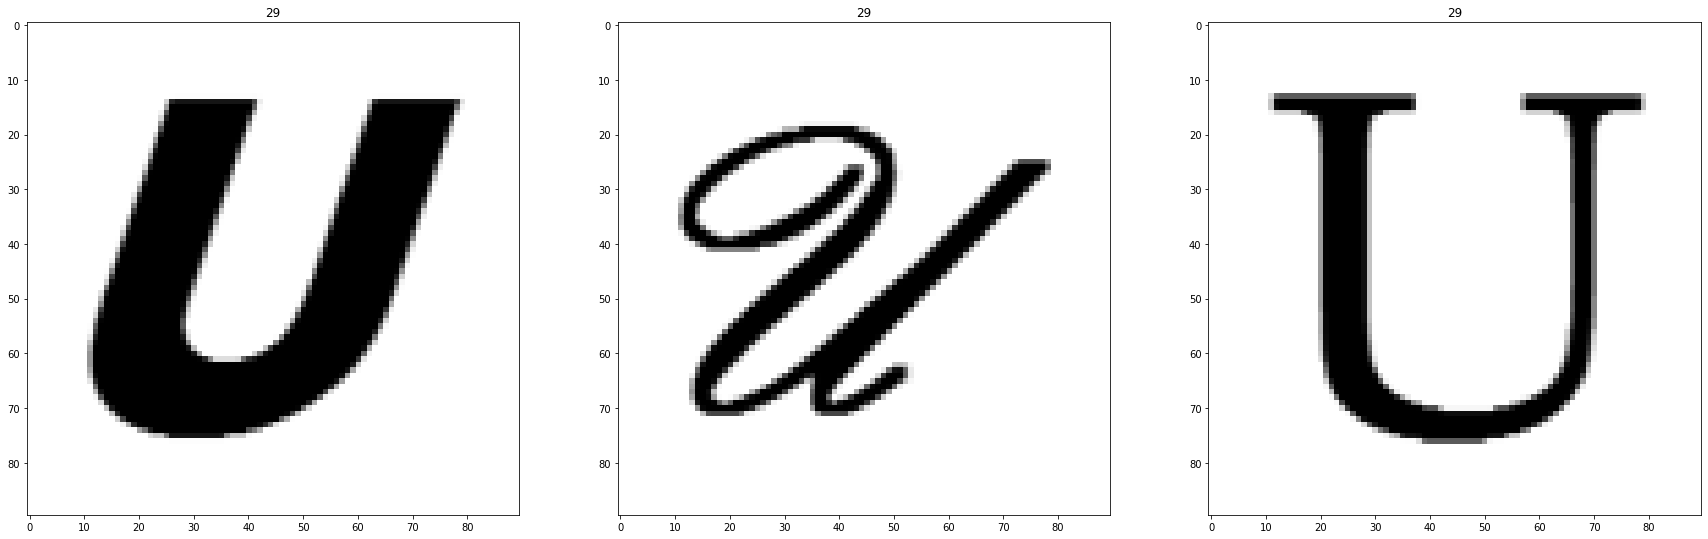

In [ ]:
# visualize data
# image_show function : num 수 만큼 dataset 내의 data를 보여주는 함수

def image_show(dataset, num):
  fig = plt.figure(figsize=(10,10))

  for i in range(num):
    plt.subplot(1, num, i+1)
    plt.imshow(dataset[i][0].squeeze(), cmap = "gray")
    plt.title(dataset[i][1])

image_show(train_data, 3)

### Check GPU Configuration

In [ ]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# FIX SEED
SEED = 1234
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)